# Desafio de Ciência de Dados - Casa Magalhães

## Challange 01
In the Challenge folder there are four csv files with daily billing information. For this challenge consider monthly value accumulation and predict the last month of the dataset.

### Importing libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn import metrics

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['figure.figsize'] = (15,5)

### Creating the path to CSV files

In [6]:
path = '../challenge/'

filename1 = 'data_1__.csv'
file1 = path + filename1

filename2 = 'data_2__.csv'
file2 = path + filename2

filename3 = 'data_3__.csv'
file3 = path + filename3

filename4 = 'data_4__.csv'
file4 = path + filename4

### Reading datasets

In [7]:
df1 = pd.read_csv(file1, delimiter=',')

df2 = pd.read_csv(file2, delimiter=',')

df3 = pd.read_csv(file3, delimiter=',')

df4 = pd.read_csv(file4, delimiter=',')

## Working with dataset 01

In [8]:
df1.head()

,index,data,valor
0,0,2016-08-29,9.00
1,1,2016-08-30,1.60
2,2,2016-08-31,15311.70
3,3,2016-09-01,13932.67
4,4,2016-09-02,11535.45


In [9]:
df1.dtypes

index      int64
data      object
valor    float64
dtype: object

In [10]:
column = ['index']
df1.drop(column, inplace=True, axis=1)

In [11]:
df1.head()

,data,valor
0,2016-08-29,9.00
1,2016-08-30,1.60
2,2016-08-31,15311.70
3,2016-09-01,13932.67
4,2016-09-02,11535.45


Function used to return only the year and the moth concatenated

In [12]:
def concat(date):
    sep = date.split('-')
    return sep[0]+sep[1]

In [13]:
concat('2000-12-23')

'200012'

In [14]:
df1['data'] = df1['data'].apply(lambda x: concat(x))

In [15]:
df1.head()

,data,valor
0,201608,9.00
1,201608,1.60
2,201608,15311.70
3,201609,13932.67
4,201609,11535.45


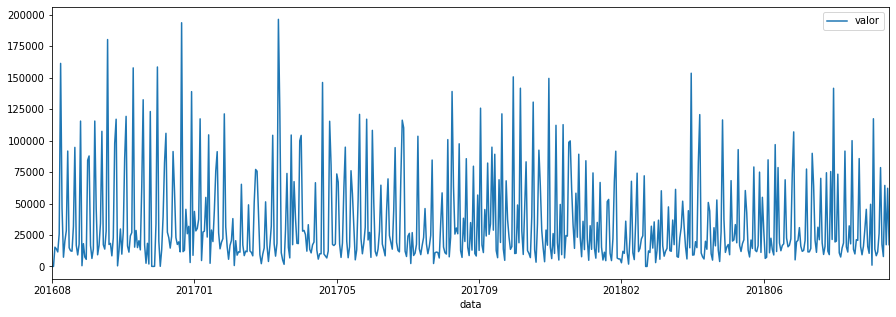

In [16]:
df1.plot(kind='line', x='data', y='valor')

In [17]:
dates = df1['data'].unique()

In [18]:
dates

array(['201608', '201609', '201610', '201611', '201612', '201701',
       '201702', '201703', '201704', '201705', '201706', '201707',
       '201708', '201709', '201710', '201711', '201712', '201801',
       '201802', '201803', '201804', '201805', '201806', '201807',
       '201808', '201809', '201810'], dtype=object)

In [19]:
d_ = {'data': dates}
df1_ = pd.DataFrame(data=d_)

In [20]:
df1_.head()

,data
0,201608
1,201609
2,201610
3,201611
4,201612


Function used to return the sum of the acumulated values of a moth

In [21]:
from functools import reduce
def acumulado(valores):
    lista = valores['valor']
    return reduce((lambda x, y: x + y), lista)

In [22]:
df1_['valor'] = df1_['data'].apply(lambda data: acumulado(df1[df1['data']==data]))

In [23]:
df1_.head()

,data,valor
0,201608,15322.30
1,201609,763561.69
2,201610,1060060.55
3,201611,972638.69
4,201612,1090154.76


In [24]:
df1_.tail()

,data,valor
22,201806,759047.88
23,201807,711501.72
24,201808,700150.67
25,201809,747653.22
26,201810,635530.09


In [25]:
df1_.dtypes

data      object
valor    float64
dtype: object

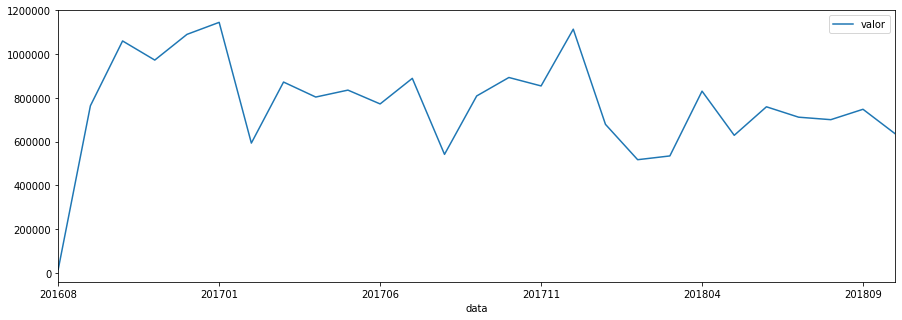

In [26]:
df1_.plot(kind='line',  x='data', y='valor')

In [27]:
df1_['data'] = df1_['data'].astype(int)

In [28]:
df1_.dtypes

data       int64
valor    float64
dtype: object

In [29]:
X_test = [[df1_['data'].values[-1]]]
y_test = [[df1_['valor'].values[-1]]]

In [30]:
train = df1_.drop(df1_.index[-1])

In [31]:
train.head()

,data,valor
0,201608,15322.30
1,201609,763561.69
2,201610,1060060.55
3,201611,972638.69
4,201612,1090154.76


In [32]:
train.tail()

,data,valor
21,201805,628620.80
22,201806,759047.88
23,201807,711501.72
24,201808,700150.67
25,201809,747653.22


In [33]:
X = pd.DataFrame(train['data'])
y = pd.DataFrame(train['valor'])

### Using Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
linear_model = LinearRegression()

In [36]:
linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_linear_model_pred = linear_model.predict(X_test)

In [38]:
print(y_linear_model_pred, y_test)

[[716782.45822836]] [[635530.0900000001]]


In [39]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_linear_model_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_linear_model_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_linear_model_pred)))

Mean Absolute Error:  81252.3682283645
Mean Squared Error:  6601947342.717737
Root Mean Squared Error:  81252.3682283645


### Using Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logistic_model = LogisticRegression(random_state=42)

In [42]:
logistic_model.fit(X,y.astype(int))

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_logistic_regression_pred = logistic_model.predict(X_test)

In [44]:
print(y_logistic_regression_pred, y_test)

[747653] [[635530.0900000001]]


In [45]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_logistic_regression_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_logistic_regression_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_logistic_regression_pred)))

Mean Absolute Error:  112122.90999999992
Mean Squared Error:  12571546946.868082
Root Mean Squared Error:  112122.90999999992


## Working with dataset 02

In [46]:
df2.head()

,index,data,valor
0,0,2014-07-18,1.50
1,1,2014-08-05,83.20
2,2,2014-08-08,22.50
3,3,2014-08-11,15.91
4,4,2014-08-12,0.44


In [47]:
df2.tail()

,index,data,valor
1537,1537,2018-10-27,19315.50
1538,1538,2018-10-28,12903.71
1539,1539,2018-10-29,11071.90
1540,1540,2018-10-30,11205.80
1541,1541,2018-10-31,12025.80


In [48]:
df2.dtypes

index      int64
data      object
valor    float64
dtype: object

In [49]:
column = ['index']
df2.drop(column, inplace=True, axis=1)

In [50]:
df2['data'] = df2['data'].apply(lambda x: concat(x))

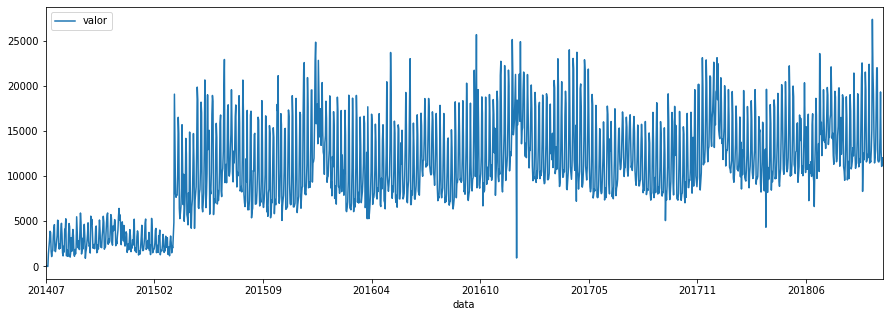

In [51]:
df2.plot(kind='line', x='data', y='valor')

In [52]:
dates = df2['data'].unique()

In [53]:
dates

array(['201407', '201408', '201409', '201410', '201411', '201412',
       '201501', '201502', '201503', '201504', '201505', '201506',
       '201507', '201508', '201509', '201510', '201511', '201512',
       '201601', '201602', '201603', '201604', '201605', '201606',
       '201607', '201608', '201609', '201610', '201611', '201612',
       '201701', '201702', '201703', '201704', '201705', '201706',
       '201707', '201708', '201709', '201710', '201711', '201712',
       '201801', '201802', '201803', '201804', '201805', '201806',
       '201807', '201808', '201809', '201810'], dtype=object)

In [54]:
d_ = {'data': dates}
df2_ = pd.DataFrame(data=d_)

In [55]:
df2_.head()

,data
0,201407
1,201408
2,201409
3,201410
4,201411


In [56]:
df2_['valor'] = df2_['data'].apply(lambda data: acumulado(df2[df2['data']==data]))

In [57]:
df2_.head()

,data,valor
0,201407,1.50
1,201408,54228.86
2,201409,79707.74
3,201410,92994.49
4,201411,99751.70


In [58]:
df2_.tail()

,data,valor
47,201806,379383.08
48,201807,482195.78
49,201808,434308.16
50,201809,438753.21
51,201810,457025.59


In [59]:
df2_.dtypes

data      object
valor    float64
dtype: object

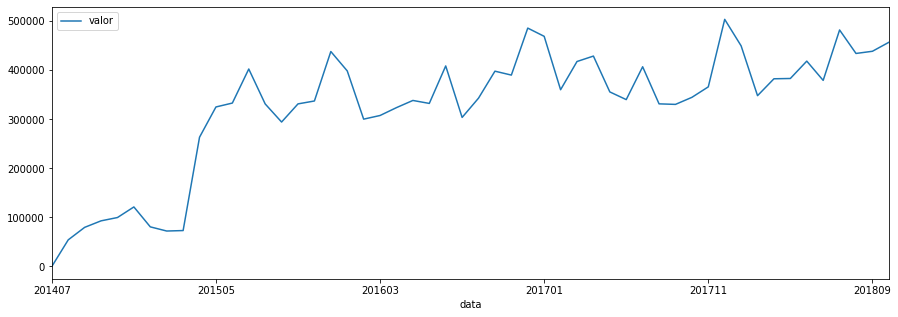

In [60]:
df2_.plot(kind='line',  x='data', y='valor')

In [61]:
df2_['data'] = df2_['data'].astype(int)

In [62]:
df2_.dtypes

data       int64
valor    float64
dtype: object

In [63]:
X_2_test = [[df2_['data'].values[-1]]]
y_2_test = [[df2_['valor'].values[-1]]]

In [64]:
train2 = df2_.drop(df2_.index[-1])

In [65]:
train2.head()

,data,valor
0,201407,1.50
1,201408,54228.86
2,201409,79707.74
3,201410,92994.49
4,201411,99751.70


In [66]:
train2.tail()

,data,valor
46,201805,418669.53
47,201806,379383.08
48,201807,482195.78
49,201808,434308.16
50,201809,438753.21


In [67]:
X_2 = pd.DataFrame(train2['data'])
y_2 = pd.DataFrame(train2['valor'])

### Using Linear Regression

In [68]:
linear_model_2 = LinearRegression()

In [69]:
linear_model_2.fit(X_2, y_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
y_2_linear_model_pred = linear_model_2.predict(X_2_test)

In [71]:
print(y_2_linear_model_pred, y_2_test)

[[461926.1480768]] [[457025.5900000001]]


In [72]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_2_test, y_2_linear_model_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_2_test, y_2_linear_model_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_2_test, y_2_linear_model_pred)))

Mean Absolute Error:  4900.558076802408
Mean Squared Error:  24015469.464113317
Root Mean Squared Error:  4900.558076802408


### Using Logistic Regression

In [73]:
logistic_model_2 = LogisticRegression(random_state=42)

In [74]:
logistic_model_2.fit(X_2, y_2.astype(int))

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
y_2_logistic_regression_pred = logistic_model_2.predict(X_test)

In [76]:
print(y_2_logistic_regression_pred, y_2_test)

[438753] [[457025.5900000001]]


In [77]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_2_test, y_2_logistic_regression_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_2_test, y_2_logistic_regression_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_2_test, y_2_logistic_regression_pred)))

Mean Absolute Error:  18272.590000000084
Mean Squared Error:  333887545.3081031
Root Mean Squared Error:  18272.590000000084


## Working with dataset 03

In [78]:
df3.head()

,index,data,valor
0,0,2018-08-21,3914.55
1,1,2018-08-22,3713.02
2,2,2018-08-23,8001.75
3,3,2018-08-24,11312.95
4,4,2018-08-25,15230.01


In [79]:
df3.tail()

,index,data,valor
67,67,2018-10-27,15060.21
68,68,2018-10-28,13367.74
69,69,2018-10-29,4178.29
70,70,2018-10-30,2623.59
71,71,2018-10-31,6190.43


In [80]:
df3.columns

Index(['index', 'data', 'valor'], dtype='object')

In [81]:
column = ['index']
df3.drop(column, inplace=True, axis=1)

In [82]:
df3.dtypes

data      object
valor    float64
dtype: object

In [83]:
df3['data'] = df3['data'].apply(lambda x: concat(x))

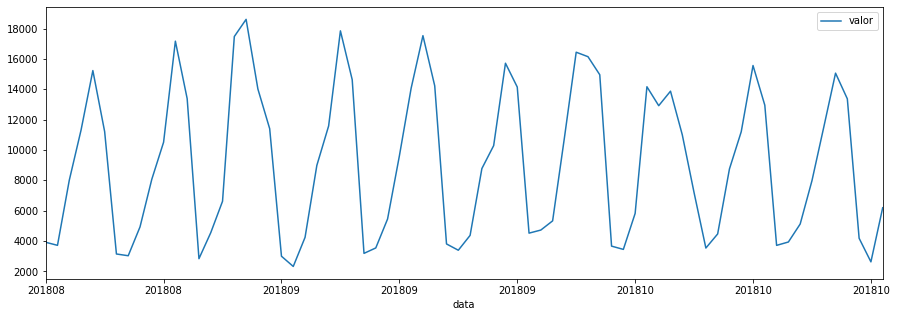

In [84]:
df3.plot(kind='line', x='data', y='valor')

In [85]:
dates = df3['data'].unique()

In [86]:
dates

array(['201808', '201809', '201810'], dtype=object)

In [87]:
d_ = {'data': dates}
df3_ = pd.DataFrame(data=d_)

In [88]:
df3_.head()

,data
0,201808
1,201809
2,201810


In [89]:
df3_['valor'] = df3_['data'].apply(lambda data: acumulado(df3[df3['data']==data]))

In [90]:
df3_.head()

,data,valor
0,201808,83050.67
1,201809,296706.28
2,201810,275052.14


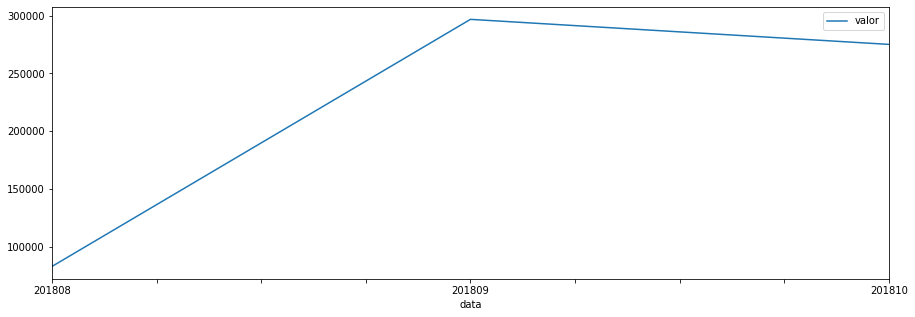

In [91]:
df3_.plot(kind='line',  x='data', y='valor')

In [92]:
df3_.dtypes

data      object
valor    float64
dtype: object

In [93]:
df3_['data'] = df3_['data'].astype(int)

In [94]:
df3_.dtypes

data       int64
valor    float64
dtype: object

In [95]:
X_3_test = [[df3_['data'].values[-1]]]
y_3_test = [[df3_['valor'].values[-1]]]

In [96]:
train3 = df3_.drop(df3_.index[-1])

In [97]:
X_3 = pd.DataFrame(train3['data'])
y_3 = pd.DataFrame(train3['valor'])

## Using Linear Regression

In [98]:
linear_model_3 = LinearRegression()

In [99]:
linear_model_3.fit(X_3, y_3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
y_3_linear_model_pred = linear_model_3.predict(X_3_test)

In [101]:
print(y_3_linear_model_pred, y_3_test)

[[510361.88999939]] [[275052.13999999996]]


In [102]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_3_test, y_3_linear_model_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_3_test, y_3_linear_model_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_3_test, y_3_linear_model_pred)))

Mean Absolute Error:  235309.7499993897
Mean Squared Error:  55370678444.775276
Root Mean Squared Error:  235309.7499993897


### Using Logistic Regression

In [103]:
logistic_model_3 = LogisticRegression(random_state=42)

In [104]:
logistic_model_3.fit(X_3, y_3.astype(int))

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
y_3_logistic_regression_pred = logistic_model_3.predict(X_3_test)

In [106]:
print(y_3_logistic_regression_pred, y_3_test)

[296706] [[275052.13999999996]]


In [107]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_3_test, y_3_logistic_regression_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_3_test, y_3_logistic_regression_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_3_test, y_3_logistic_regression_pred)))

Mean Absolute Error:  21653.860000000044
Mean Squared Error:  468889652.89960194
Root Mean Squared Error:  21653.860000000044


## Working with dataset 04

In [108]:
df4.head()

,Srore_id,Product id,YearMonth,Volume
0,DM-01,pd_1,201301,7668.0000
1,DM-01,pd_1,201401,14.1432
2,DM-01,pd_1,201501,11112.0000
3,DM-01,pd_1,201601,15336.0000
4,DM-01,pd_1,201701,15.9885


In [109]:
df4.tail()

,Srore_id,Product id,YearMonth,Volume
55,DM-01,pd_1,201309,18744.0000
56,DM-01,pd_1,201409,13.7172
57,DM-01,pd_1,201509,13.5784
58,DM-01,pd_1,201609,16.4436
59,DM-01,pd_1,201709,25.2192


In [110]:
df4.columns

Index(['Srore_id', 'Product id', 'YearMonth', 'Volume'], dtype='object')

In [111]:
columns = ['Srore_id', 'Product id']
df4.drop(columns, inplace=True, axis=1)

In [112]:
df4.head()

,YearMonth,Volume
0,201301,7668.0000
1,201401,14.1432
2,201501,11112.0000
3,201601,15336.0000
4,201701,15.9885


In [113]:
df4.dtypes

YearMonth      int64
Volume       float64
dtype: object

In [114]:
dates = df4['YearMonth'].unique()
dates

array([201301, 201401, 201501, 201601, 201701, 201310, 201410, 201510,
       201610, 201710, 201311, 201411, 201511, 201611, 201711, 201312,
       201412, 201512, 201612, 201712, 201302, 201402, 201502, 201602,
       201702, 201303, 201403, 201503, 201603, 201703, 201304, 201404,
       201504, 201604, 201704, 201305, 201405, 201505, 201605, 201705,
       201306, 201406, 201506, 201606, 201706, 201307, 201407, 201507,
       201607, 201707, 201308, 201408, 201508, 201608, 201708, 201309,
       201409, 201509, 201609, 201709])

In [115]:
df4 = df4.sort_values(by='YearMonth', ascending=True)

In [116]:
df4.head()

,YearMonth,Volume
0,201301,7668.0000
20,201302,10.3092
25,201303,16.5288
30,201304,13.3764
35,201305,20.2776


In [117]:
df4.tail()

,YearMonth,Volume
54,201708,27.3492
59,201709,25.2192
9,201710,23.9412
14,201711,28.2012
19,201712,22.0668


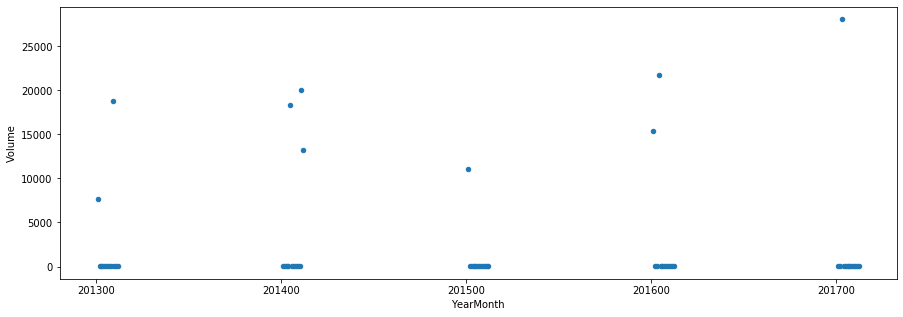

In [118]:
df4.plot(kind='scatter', x='YearMonth', y='Volume')

In [119]:
X_4_test = [[df4['YearMonth'].values[-1]]]
y_4_test = [[df4['Volume'].values[-1]]]

In [120]:
train4 = df4.drop(df4.index[-1])

In [121]:
X_4 = pd.DataFrame(train4['YearMonth'])
y_4 = pd.DataFrame(train4['Volume'])

### Using Linear Regression

In [122]:
linear_model_4 = LinearRegression()

In [123]:
linear_model_4.fit(X_4, y_4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
y_4_linear_model_pred = linear_model_4.predict(X_4_test)

In [125]:
print(y_4_linear_model_pred, y_4_test)

[[2503.97503045]] [[22.0668]]


In [126]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_4_test, y_4_linear_model_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_4_test, y_4_linear_model_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_4_test, y_4_linear_model_pred)))

Mean Absolute Error:  2481.9082304542976
Mean Squared Error:  6159868.464396783
Root Mean Squared Error:  2481.9082304542976


### Using Logistic Regression

In [127]:
logistic_model_4 = LogisticRegression()

In [128]:
logistic_model_4.fit(X_4, y_4.astype(int))

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
y_4_logistic_regression_pred = linear_model_4.predict(X_4_test)

In [130]:
print(y_4_logistic_regression_pred, y_4_test)

[[2503.97503045]] [[22.0668]]


In [131]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_4_test, y_4_logistic_regression_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_4_test, y_4_logistic_regression_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_4_test, y_4_logistic_regression_pred)))

Mean Absolute Error:  2481.9082304542976
Mean Squared Error:  6159868.464396783
Root Mean Squared Error:  2481.9082304542976
